### Importing neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                  #for making graphs
import folium                                    #for making maps   
from folium.plugins import MarkerCluster         #to cluster various markers in one place
from folium.features import Circle                
from folium.plugins import MousePosition
%matplotlib inline

### Creating DataFrame

In [2]:
main_df= pd.read_csv(r"C:\Users\simra\Documents\Kaggle Datasets\gun-violence-data_01-2013_03-2018.csv") #kaggle dataset on Gun violence in USA
main_df.head()

incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...                    participant_age  \
0                        False  ...                              0::20   
1                        False  ...                              0::20   
2                        False  ...  0::25||1::31||2::33||3::34||4::33   
3                        False  ...         0::29||1::33||2::56||3::33   
4                        False  ...         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                    participant_name  \
0                                     0::Julian Sims   
1                                  0::Bernard Gillis   
2  0::Damien Bell||1::Desmen Noble||2::Herman Sea...   
3  0::Stacie Philbrook||1::Christopher Ratliffe||...   
4  0::Danielle Imani Jameison||1::Maurice Eugene ...   

   participant_relationship  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                 3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                  NaN   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                 62.0   
2  http://www.morningjournal.com/ge

Exploring the types of columns in the dataframe

In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [4]:
main_df.describe()

incident_id       n_killed      n_injured  congressional_district  \
count  2.396770e+05  239677.000000  239677.000000           227733.000000   
mean   5.593343e+05       0.252290       0.494007                8.001265   
std    2.931287e+05       0.521779       0.729952                8.480835   
min    9.211400e+04       0.000000       0.000000                0.000000   
25%    3.085450e+05       0.000000       0.000000                2.000000   
50%    5.435870e+05       0.000000       0.000000                5.000000   
75%    8.172280e+05       0.000000       1.000000               10.000000   
max    1.083472e+06      50.000000      53.000000               53.000000   

            latitude      longitude  n_guns_involved  state_house_district  \
count  231754.000000  231754.000000    140226.000000         200905.000000   
mean       37.546598     -89.338348         1.372442             55.447132   
std         5.130763      14.359546         4.678202             42.048117   
min        19.111400    -171.429000         1.000000              1.000000   
25%        33.903400     -94.158725         1.000000             21.000000   
50%        38.570600     -86.249600         1.000000             47.000000   
75%        41.437375     -80.048625         1.000000             84.000000   
max        71.336800      97.433100       400.000000            901.000000   

       state_senate_district  
count           207342.00000  
mean                20.47711  
std                 14.20456  
min                  1.00000  
25%                  9.00000  
50%                 19.00000  
75%                 30.00000  
max                 94.00000

Creating a **new_df** to preserve the source DF. i.e. "main_df"

In [5]:
new_df = main_df.filter(['incident_id', 'date', 'state', 'n_killed', 'n_injured', 'latitude', 'longitude', 'address'], axis=1)
new_df.head()

incident_id        date           state  n_killed  n_injured  latitude  \
0       461105  2013-01-01    Pennsylvania         0          4   40.3467   
1       460726  2013-01-01      California         1          3   33.9090   
2       478855  2013-01-01            Ohio         1          3   41.4455   
3       478925  2013-01-05        Colorado         4          0   39.6518   
4       478959  2013-01-07  North Carolina         2          2   36.1140   

   longitude                                    address  
0   -79.8559  1506 Versailles Avenue and Coursin Street  
1  -118.3330               13500 block of Cerise Avenue  
2   -82.1377                      1776 East 28th Street  
3  -104.8020           16000 block of East Ithaca Place  
4   -79.9569                  307 Mourning Dove Terrace

Creating **df1** which sums *n_killed* i.e. the number of people killed in each state in this data from 2013 to 2018. 

In [6]:
new_df.groupby('state').agg('sum')['n_killed']
df1 = pd.DataFrame(new_df.groupby('state').agg('sum')['n_killed'])
rng = pd.Index(range(0,51,1))
df1 = df1.reset_index().set_index(rng)
df1.sort_values('n_killed', ascending= False, inplace= True)
df1.head()

state  n_killed
4   California      5562
43       Texas      5046
9      Florida      3909
13    Illinois      3409
35        Ohio      2508

As we can see the highest number of deaths occured in **California:5562** followed by **Texas:5046**, **Florida:3909**.

C:\Users\simra\AppData\Local\Temp\ipykernel_23936\350014868.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


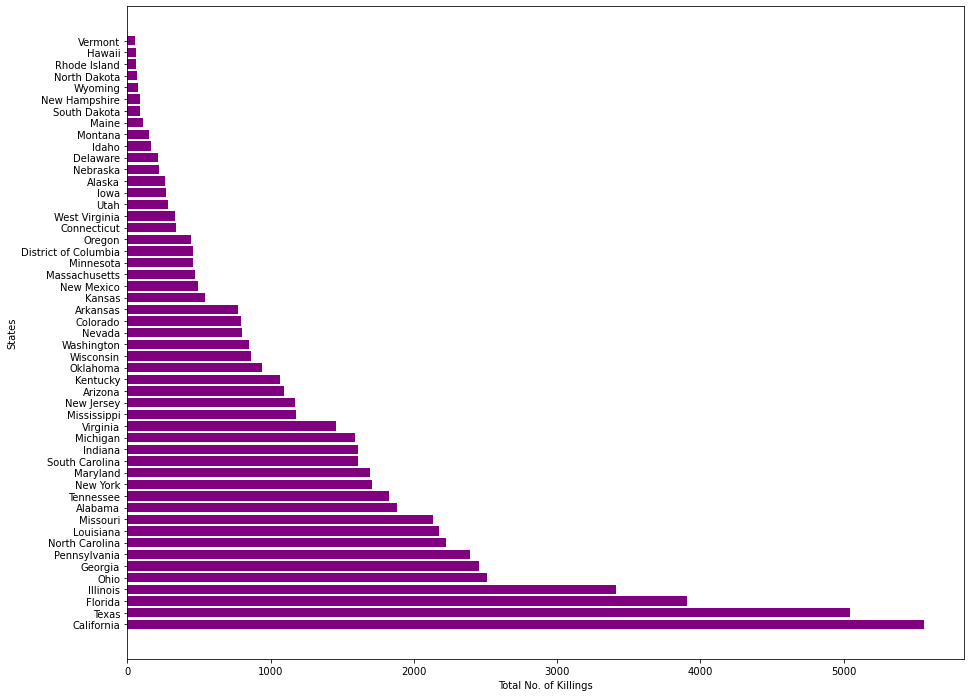

In [7]:
fig,  ax= plt.subplots()
ax.barh( df1['state'], df1['n_killed'], color = 'purple')
ax.set_xlabel('Total No. of Killings')
ax.set_ylabel('States')
fig.set_size_inches(15,12)

fig.show()

### Creating map of the 100 most deadlisest gun violence incidents in the united states according to this dataset. 
1) We drop NaNs. 

In [8]:
new_df= new_df.dropna(subset=['longitude'])
new_df= new_df.dropna(subset=['latitude'])

2) We sort the data based on 'n_killed', from most to the least. 

In [9]:
new_df= new_df.dropna(subset=['longitude'])
new_df= new_df.dropna(subset=['latitude'])
new_df = new_df.sort_values('n_killed', ascending= False)
new_df1= new_df.head(100)
new_df1.describe

<bound method NDFrame.describe of         incident_id        date                 state  n_killed  n_injured  \
130448       577157  2016-06-12               Florida        50         53   
217151       980577  2017-11-05                 Texas        27         20   
232745      1049217  2018-02-14               Florida        17         17   
101531       456893  2015-12-02            California        16         19   
194          480366  2013-09-16  District of Columbia        11          3   
...             ...         ...                   ...       ...        ...   
68317        333750  2015-05-03             Wisconsin         4          1   
151406       676663  2016-10-15            California         4         11   
18242        138282  2014-05-23            California         4          8   
188          479747  2013-09-12             Tennessee         4          0   
160641       725323  2016-12-09                 Texas         4          0   

        latitude  longitude  

3) Creating the Map that shows the location address of each shooting.

In [10]:
from folium import plugins
from folium.plugins import HeatMap
from folium.features import DivIcon

map_a = folium.Map(location= [40.788,-79.879] , zoom_start= 4)


for index, row in new_df1.iterrows():
    circle = folium.Circle([row['latitude'], row['longitude']], radius = 1000, color = 'b', fill = True)
    iframe = folium.IFrame(html = '<div style="font-size: 12; "><b>%s</b></div>' % row['address'], width=100, height=100 )
    popup = folium.Popup(iframe, max_width=100)
    marker = folium.map.Marker([row['latitude'], row['longitude']], popup=popup)
    map_a.add_child(circle)
    map_a.add_child(marker)    
map_a

### Since we cannot fit all 25k+ entries on a single map. A heatmap would provide a better overview of the places where the most number of incidents occured.

Making a list of all the coordinates in the dataframe:

In [11]:
lat = new_df.latitude.to_list()
lng = new_df.longitude.to_list()

### Heatmap:

In [14]:
from folium.plugins import HeatMap
map_h= folium.Map(location= [40.788,-79.879], tiles='cartodbdark_matter' , zoom_start= 4)
HeatMap(list(zip(lat, lng)), gradient={0.1: 'blue', 0.5: 'lime', 0.8: 'red'}, radius=7, blur= 10).add_to(map_h)
for index, row in new_df1.iterrows():
    circle = folium.Circle([row['latitude'], row['longitude']], radius = 1000, color = 'b', fill = True)
    iframe = folium.IFrame(html = '<div style="font-size: 12; "><b>%s</b></div>' % row['address'], width=100, height=100 )
    popup = folium.Popup(iframe, max_width=100)
    marker = folium.map.Marker([row['latitude'], row['longitude']], popup=popup)
    map_h.add_child(circle)
    map_h.add_child(marker)    
map_h
map_h